In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv(r'post_ls_30days_may.txt',sep='\t')
data.shape

(172202, 44)

In [3]:
data

,Co_id,activation_dt,AON,AGE,NUMBER_OF_OS_BILLS,RECURRING_AMT,NATIONALITY,value_base_seg,BARRING_STATUS,ACTIVATION_CHANNEL_TYPE,...,jan_bill,CIVIL_ID_VOICE_IN_COMMITMENT_LINE_CNT,CIVIL_ID_VOICE_NOT_COMMITTED_LINE_CNT,CIVIL_ID_DATA_IN_COMMITMENT_LINE_CNT,CIVIL_ID_DATA_NOT_COMMITTED_LINE_CNT,A_freeze_status,D_freeze_status,TOP_LOC_5G,congested_flag,churn
0,14086666,6/1/2016,1339,51,1,?,Kuwait,1 WBB H,BARRED,?,...,0.000,1,0,1,0,?,?,?,?,0
1,13431983,2/18/2016,1443,32,1,?,India,2 WBB M,BARRED,?,...,6.000,0,0,1,0,?,?,N,Y,0
2,10367687,6/1/2015,1705,38,1,8.000,India,2 WBB M,BARRED,?,...,6.500,0,0,1,0,?,?,Y,Y,0
3,16538266,10/1/2017,852,29,1,15.000,Kuwait,1 WBB H,BARRED,?,...,9.000,0,1,1,2,?,?,Y,Y,0
4,19522544,7/28/2019,187,39,1,37.000,Kuwait,1 WBB H,NOT BARRED,?,...,27.000,2,0,2,0,?,?,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172197,13531232,3/3/2016,1429,64,2,12.000,Kuwait,1 WBB H,BARRED,?,...,10.000,0,0,1,0,?,?,?,?,0
172198,11882279,6/1/2015,1705,?,?,0.000,?,2 WBB M,?,?,...,4.200,?,?,?,?,?,?,?,?,0
172199,19139483,4/27/2019,279,34,1,?,Kuwait,1 WBB H,NOT BARRED,?,...,12.000,1,0,0,1,?,?,?,?,0
172200,17368056,4/21/2018,650,38,3,6.000,Syrian Arab Republic,2 WBB M,BARRED,?,...,7.500,1,0,2,0,?,?,N,Y,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172202 entries, 0 to 172201
Data columns (total 44 columns):
Co_id                                    172202 non-null int64
activation_dt                            172202 non-null object
AON                                      172202 non-null int64
AGE                                      172202 non-null object
NUMBER_OF_OS_BILLS                       172202 non-null object
RECURRING_AMT                            172202 non-null object
NATIONALITY                              172202 non-null object
value_base_seg                           172202 non-null object
BARRING_STATUS                           172202 non-null object
ACTIVATION_CHANNEL_TYPE                  172202 non-null object
LAST_BILL_AMT                            172202 non-null object
LAST_PAY_AMT                             172202 non-null object
TOT_BILLED_OS_AMT                        172202 non-null object
jan_out_call_dur                         172202 non-null ob

In [5]:
data.columns

Index(['Co_id', 'activation_dt', 'AON', 'AGE', 'NUMBER_OF_OS_BILLS',
       'RECURRING_AMT', 'NATIONALITY', 'value_base_seg', 'BARRING_STATUS',
       'ACTIVATION_CHANNEL_TYPE', 'LAST_BILL_AMT', 'LAST_PAY_AMT',
       'TOT_BILLED_OS_AMT', 'jan_out_call_dur', 'COMMIT_MONTH',
       'Contarct_status', 'LEFT_DAYS', 'FiveG_plan', 'LEFT_MONTHS',
       'sim_device_commit', 'jan_package', 'jan_offer_price', 'GTL_FACTOR',
       'jan_complaints', 'shared_sim', 'child_sim', 'jan_revenue', 'OTT',
       'jan_call_amt', 'jan_data_usage', 'jan_in_call_amt', 'jan_in_call_cnt',
       'jan_out_call_amt', 'jan_out_call_cnt', 'jan_bill',
       'CIVIL_ID_VOICE_IN_COMMITMENT_LINE_CNT',
       'CIVIL_ID_VOICE_NOT_COMMITTED_LINE_CNT',
       'CIVIL_ID_DATA_IN_COMMITMENT_LINE_CNT',
       'CIVIL_ID_DATA_NOT_COMMITTED_LINE_CNT', 'A_freeze_status',
       'D_freeze_status', 'TOP_LOC_5G', 'congested_flag', 'churn'],
      dtype='object')

In [36]:
num_data = data[['AON', 'AGE', 'NUMBER_OF_OS_BILLS',
       'RECURRING_AMT', 'LAST_BILL_AMT', 'LAST_PAY_AMT',
       'TOT_BILLED_OS_AMT', 'jan_out_call_dur', 'COMMIT_MONTH',
       'LEFT_DAYS', 'FiveG_plan', 'LEFT_MONTHS',
       'jan_package', 'jan_offer_price', 'GTL_FACTOR',
       'jan_complaints', 'shared_sim', 'child_sim', 'jan_revenue', 'OTT',
       'jan_call_amt', 'jan_data_usage', 'jan_in_call_amt', 'jan_in_call_cnt',
       'jan_out_call_amt', 'jan_out_call_cnt', 'jan_bill',
       'CIVIL_ID_VOICE_IN_COMMITMENT_LINE_CNT',
       'CIVIL_ID_VOICE_NOT_COMMITTED_LINE_CNT',
       'CIVIL_ID_DATA_IN_COMMITMENT_LINE_CNT',
       'CIVIL_ID_DATA_NOT_COMMITTED_LINE_CNT', 'churn']].replace('?',0).astype('float64')

In [37]:
num_data1 = pd.concat([num_data,data['Co_id']],axis=1)
num_data1.columns

Index(['AON', 'AGE', 'NUMBER_OF_OS_BILLS', 'RECURRING_AMT', 'LAST_BILL_AMT',
       'LAST_PAY_AMT', 'TOT_BILLED_OS_AMT', 'jan_out_call_dur', 'COMMIT_MONTH',
       'LEFT_DAYS', 'FiveG_plan', 'LEFT_MONTHS', 'jan_package',
       'jan_offer_price', 'GTL_FACTOR', 'jan_complaints', 'shared_sim',
       'child_sim', 'jan_revenue', 'OTT', 'jan_call_amt', 'jan_data_usage',
       'jan_in_call_amt', 'jan_in_call_cnt', 'jan_out_call_amt',
       'jan_out_call_cnt', 'jan_bill', 'CIVIL_ID_VOICE_IN_COMMITMENT_LINE_CNT',
       'CIVIL_ID_VOICE_NOT_COMMITTED_LINE_CNT',
       'CIVIL_ID_DATA_IN_COMMITMENT_LINE_CNT',
       'CIVIL_ID_DATA_NOT_COMMITTED_LINE_CNT', 'churn', 'Co_id'],
      dtype='object')

In [38]:
rr = num_data.corr()
sorted_corrs = rr['churn'].abs().sort_values(ascending = False)
sorted_corrs

churn                                    1.000000
CIVIL_ID_DATA_NOT_COMMITTED_LINE_CNT     0.075623
CIVIL_ID_VOICE_NOT_COMMITTED_LINE_CNT    0.036467
RECURRING_AMT                            0.036331
CIVIL_ID_DATA_IN_COMMITMENT_LINE_CNT     0.036150
jan_out_call_amt                         0.031954
LAST_PAY_AMT                             0.021828
AON                                      0.016789
LAST_BILL_AMT                            0.016406
jan_out_call_cnt                         0.014473
CIVIL_ID_VOICE_IN_COMMITMENT_LINE_CNT    0.014132
TOT_BILLED_OS_AMT                        0.013655
jan_data_usage                           0.013509
NUMBER_OF_OS_BILLS                       0.009555
jan_offer_price                          0.005826
FiveG_plan                               0.005111
jan_revenue                              0.005040
jan_bill                                 0.003865
GTL_FACTOR                               0.003811
AGE                                      0.001930


In [39]:
num_data = num_data.drop(['jan_out_call_dur',                              
'jan_complaints',                                
'shared_sim',                                    
'child_sim',                                     
'OTT',                                           
'jan_call_amt'],axis=1)

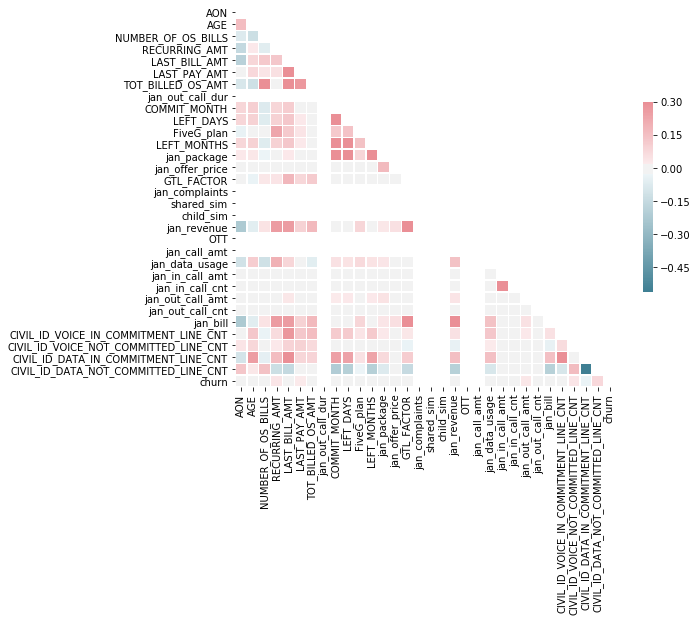

In [40]:
mask = np.triu(np.ones_like(rr, dtype=np.bool))
f, ax = plt.subplots(figsize=(10, 7))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(rr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

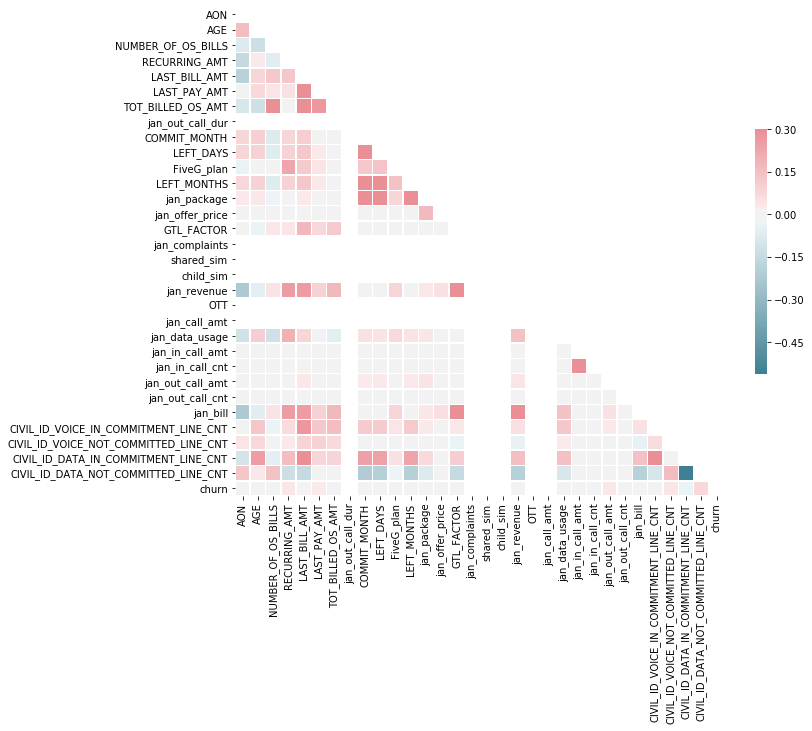

In [41]:
mask = np.triu(np.ones_like(rr, dtype=np.bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(rr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [42]:
object_data = data[['value_base_seg', 'BARRING_STATUS',
       'ACTIVATION_CHANNEL_TYPE','Contarct_status','sim_device_commit','A_freeze_status',
       'D_freeze_status', 'TOP_LOC_5G', 'congested_flag']]
object_data = pd.get_dummies(object_data,dummy_na=True)

In [43]:
num_data

,AON,AGE,NUMBER_OF_OS_BILLS,RECURRING_AMT,LAST_BILL_AMT,LAST_PAY_AMT,TOT_BILLED_OS_AMT,COMMIT_MONTH,LEFT_DAYS,FiveG_plan,...,jan_in_call_amt,jan_in_call_cnt,jan_out_call_amt,jan_out_call_cnt,jan_bill,CIVIL_ID_VOICE_IN_COMMITMENT_LINE_CNT,CIVIL_ID_VOICE_NOT_COMMITTED_LINE_CNT,CIVIL_ID_DATA_IN_COMMITMENT_LINE_CNT,CIVIL_ID_DATA_NOT_COMMITTED_LINE_CNT,churn
0,1339.0,51.0,1.0,0.0,31.9,16.000,16.853,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1443.0,32.0,1.0,0.0,8.0,6.000,6.000,13.0,290.0,0.0,...,0.0,0.0,0.0,0.0,6.0,0.0,0.0,1.0,0.0,0.0
2,1705.0,38.0,1.0,8.0,0.0,5.000,3.500,25.0,623.0,0.0,...,0.0,0.0,0.0,0.0,6.5,0.0,0.0,1.0,0.0,0.0
3,852.0,29.0,1.0,15.0,47.5,35.887,47.500,25.0,662.0,1.0,...,0.0,0.0,0.0,0.0,9.0,0.0,1.0,1.0,2.0,0.0
4,187.0,39.0,1.0,37.0,68.0,58.000,58.000,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,27.0,2.0,0.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172197,1429.0,64.0,2.0,12.0,12.0,20.000,20.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,0.0,0.0,1.0,0.0,0.0
172198,1705.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.2,0.0,0.0,0.0,0.0,0.0
172199,279.0,34.0,1.0,0.0,12.0,24.000,12.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,12.0,1.0,0.0,0.0,1.0,0.0
172200,650.0,38.0,3.0,6.0,12.0,15.000,11.500,13.0,293.0,0.0,...,0.0,0.0,0.0,0.0,7.5,1.0,0.0,2.0,0.0,0.0


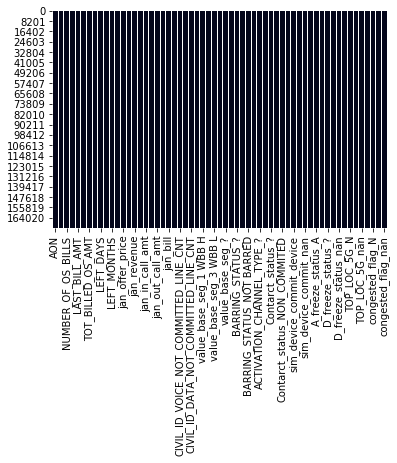

In [44]:
post_ls = pd.concat([num_data,object_data],axis=1)
sns.heatmap(post_ls.isnull(), cbar=False)

In [45]:
post_ls.isnull().sum()

AON                                      0
AGE                                      0
NUMBER_OF_OS_BILLS                       0
RECURRING_AMT                            0
LAST_BILL_AMT                            0
LAST_PAY_AMT                             0
TOT_BILLED_OS_AMT                        0
COMMIT_MONTH                             0
LEFT_DAYS                                0
FiveG_plan                               0
LEFT_MONTHS                              0
jan_package                              0
jan_offer_price                          0
GTL_FACTOR                               0
jan_revenue                              0
jan_data_usage                           0
jan_in_call_amt                          0
jan_in_call_cnt                          0
jan_out_call_amt                         0
jan_out_call_cnt                         0
jan_bill                                 0
CIVIL_ID_VOICE_IN_COMMITMENT_LINE_CNT    0
CIVIL_ID_VOICE_NOT_COMMITTED_LINE_CNT    0
CIVIL_ID_DA

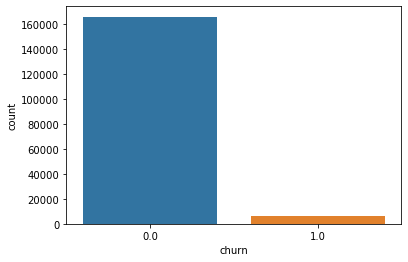

In [46]:
sns.countplot(post_ls.churn)

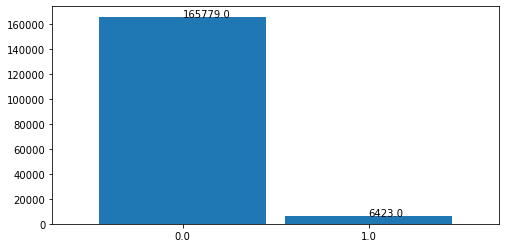

In [47]:
PQ = post_ls['churn'].value_counts().sort_index()

plt.figure(figsize=(8,4))
ax=PQ.plot.bar(width=.9) 
#ax = sns.countplot(x="class", data=data)
plt.xticks(rotation=0)
for i, v in PQ.reset_index().iterrows():
    ax.text(i, v.churn + 0.2 , v.churn, color='black')

In [48]:
post_ls.churn.value_counts()

0.0    165779
1.0      6423
Name: churn, dtype: int64

In [49]:
for col in post_ls.columns: 
    print(col)

AON
AGE
NUMBER_OF_OS_BILLS
RECURRING_AMT
LAST_BILL_AMT
LAST_PAY_AMT
TOT_BILLED_OS_AMT
COMMIT_MONTH
LEFT_DAYS
FiveG_plan
LEFT_MONTHS
jan_package
jan_offer_price
GTL_FACTOR
jan_revenue
jan_data_usage
jan_in_call_amt
jan_in_call_cnt
jan_out_call_amt
jan_out_call_cnt
jan_bill
CIVIL_ID_VOICE_IN_COMMITMENT_LINE_CNT
CIVIL_ID_VOICE_NOT_COMMITTED_LINE_CNT
CIVIL_ID_DATA_IN_COMMITMENT_LINE_CNT
CIVIL_ID_DATA_NOT_COMMITTED_LINE_CNT
churn
value_base_seg_1 WBB H
value_base_seg_2 WBB M
value_base_seg_3 WBB L
value_base_seg_7.Internal Test
value_base_seg_?
value_base_seg_nan
BARRING_STATUS_?
BARRING_STATUS_BARRED
BARRING_STATUS_NOT BARRED
BARRING_STATUS_nan
ACTIVATION_CHANNEL_TYPE_?
ACTIVATION_CHANNEL_TYPE_nan
Contarct_status_?
Contarct_status_COMMITED
Contarct_status_NON_COMMITED
Contarct_status_nan
sim_device_commit_device
sim_device_commit_sim
sim_device_commit_nan
A_freeze_status_?
A_freeze_status_A
A_freeze_status_nan
D_freeze_status_?
D_freeze_status_D
D_freeze_status_nan
TOP_LOC_5G_?
TOP_LOC_5G_

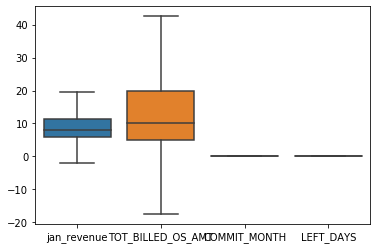

In [50]:
cols=['jan_revenue','TOT_BILLED_OS_AMT',     
'COMMIT_MONTH',        
'LEFT_DAYS']
sns.boxplot(data=post_ls[cols],showfliers=False)

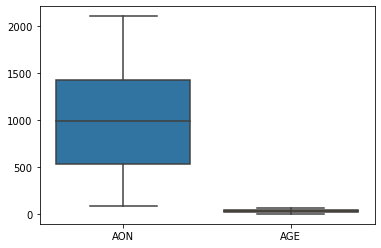

In [51]:
cols=['AON','AGE']
sns.boxplot(data=post_ls[cols],showfliers=False)

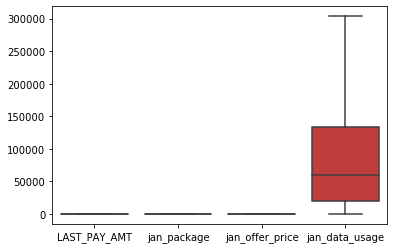

In [52]:
cols=['LAST_PAY_AMT','jan_package','jan_offer_price',       
        
'jan_data_usage']
sns.boxplot(data=post_ls[cols],showfliers=False)

In [53]:
rr = post_ls.select_dtypes(include='float64').corr()
sorted_corrs = rr['churn'].abs().sort_values(ascending = False)
sorted_corrs

churn                                    1.000000
CIVIL_ID_DATA_NOT_COMMITTED_LINE_CNT     0.075623
CIVIL_ID_VOICE_NOT_COMMITTED_LINE_CNT    0.036467
RECURRING_AMT                            0.036331
CIVIL_ID_DATA_IN_COMMITMENT_LINE_CNT     0.036150
jan_out_call_amt                         0.031954
LAST_PAY_AMT                             0.021828
AON                                      0.016789
LAST_BILL_AMT                            0.016406
jan_out_call_cnt                         0.014473
CIVIL_ID_VOICE_IN_COMMITMENT_LINE_CNT    0.014132
TOT_BILLED_OS_AMT                        0.013655
jan_data_usage                           0.013509
NUMBER_OF_OS_BILLS                       0.009555
jan_offer_price                          0.005826
FiveG_plan                               0.005111
jan_revenue                              0.005040
jan_bill                                 0.003865
GTL_FACTOR                               0.003811
AGE                                      0.001930


In [54]:
X = post_ls.drop(['churn'],axis=1)
y = post_ls.churn

In [55]:
A=X
B=y

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [57]:
from sklearn.model_selection import StratifiedKFold
skfolds = StratifiedKFold(n_splits=20,random_state=100,shuffle=True)

In [58]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500,min_samples_split = 30,min_samples_leaf=10,max_features='sqrt',
                                max_depth=10,bootstrap=True,random_state=100)

In [59]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf,X,y,cv=skfolds,scoring='roc_auc')
print('Cross Validation Scores are: {}'.format(scores))
print('Cross Validation Score Averages are: {}'.format(scores.mean()))

Cross Validation Scores are: [0.77207614 0.76781846 0.78503583 0.78890783 0.77358331 0.7602477
 0.79488392 0.79386749 0.75526229 0.76004306 0.80206098 0.78760501
 0.75359003 0.79065789 0.76645041 0.78117623 0.79743488 0.77046692
 0.75342617 0.77159824]
Cross Validation Score Averages are: 0.7763096400042315


In [60]:
from sklearn.model_selection import cross_val_predict
y_pred = cross_val_predict(rf,X,y,cv=skfolds)

In [61]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y,y_pred)

array([[165779,      0],
       [  6341,     82]], dtype=int64)

In [62]:
from sklearn.metrics import precision_score,recall_score
print("Precision :",precision_score(y,y_pred))
print('Recall :',recall_score(y,y_pred))

Precision : 1.0
Recall : 0.012766619959520473


In [63]:
from sklearn.utils import resample

churn_majority = post_ls[post_ls.churn==0]
churn_minority = post_ls[post_ls.churn==1]

upsampled = resample(churn_minority,replace=True,n_samples=len(churn_majority),random_state=123)

post_ls_upsampled = pd.concat([churn_majority,upsampled]).reset_index(drop=True)

In [64]:
post_ls_upsampled.shape

(331558, 59)

In [65]:
np.random.seed(1)
post_ls_upsampled = post_ls_upsampled.reindex(np.random.permutation(post_ls_upsampled.index))

In [66]:
X = post_ls_upsampled.drop(['churn'],axis=1)
y = post_ls_upsampled.churn

In [67]:
X_train = X.iloc[:round(len(X)/2)].copy()
y_train = y.iloc[:round(len(X)/2)].copy()
print("x_train shape :",X_train.shape)
print("y_train shape :",y_train.shape)
y_train.value_counts()

x_train shape : (165779, 58)
y_train shape : (165779,)


0.0    83197
1.0    82582
Name: churn, dtype: int64

In [68]:
X_test = X.iloc[round(len(X)/2):round(len(X)*(3/4))].copy()
y_test = y.iloc[round(len(X)/2):round(len(X)*(3/4))].copy()
print("x_test shape :",X_test.shape)
print("y_test shape :",y_test.shape)
y_test.value_counts()

x_test shape : (82889, 58)
y_test shape : (82889,)


1.0    41609
0.0    41280
Name: churn, dtype: int64

In [69]:
X_val = X.iloc[round(len(X)*(3/4)):].copy()
y_val = y.iloc[round(len(X)*(3/4)):].copy()
print("x_valid shape :",X_val.shape)
print("y_valid shape :",y_val.shape)
y_val.value_counts()

x_valid shape : (82890, 58)
y_valid shape : (82890,)


1.0    41588
0.0    41302
Name: churn, dtype: int64

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier 
from sklearn.svm import SVC




import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing

from sklearn import ensemble
from sklearn import metrics
from sklearn.metrics import classification_report,recall_score,accuracy_score,precision_score
from sklearn.model_selection import train_test_split

In [ ]:
seed=42

#rf=RandomForestClassifier(random_state=seed,n_estimators=80,class_weight={1:4},min_samples_leaf=10,max_depth=10,max_features=5,bootstrap=True)       
#dt=DecisionTreeClassifier(random_state=seed,class_weight={1:4},min_samples_leaf=8,max_depth=3)
rf = RandomForestClassifier(n_estimators=300,min_samples_split = 30,min_samples_leaf=20,max_features='sqrt',
                                max_depth=35,bootstrap=True,random_state=100)
dt=DecisionTreeClassifier(min_samples_split = 20,min_samples_leaf=20,max_features='sqrt',
                                max_depth=45,random_state=100)

#n_estimators=500,min_samples_split = 30,min_samples_leaf=10,max_features='sqrt',
 #                               max_depth=10,bootstrap=True,random_state=100)
#lr=LogisticRegression(random_state=seed)
lr=LogisticRegression(class_weight={1:2}, random_state=seed)
sgd = SGDClassifier()
#svc=SVC(random_state=seed)

gbc=ensemble.GradientBoostingClassifier()

#rf=RandomForestClassifier(random_state=seed)
lr=LogisticRegression(random_state=seed)
#dt=DecisionTreeClassifier(random_state=seed)
sgd = SGDClassifier()
#svc=SVC(random_state=seed)

#create a list of models
models=[rf,lr,dt]

def score_model(X_train,y_train,X_test,Y_test,X_val,y_val):
    df_columns=[]
    df=pd.DataFrame(columns=df_columns)
    i=0
    #read model one by one
    for model in models:
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        y_val_pred=model.predict(X_val)
        
        #compute metrics
        train_accuracy=model.score(X_train,y_train)
        test_accuracy=model.score(X_test,y_test)
        valid_accuracy = model.score(X_val,y_val)
        
        p_score=metrics.precision_score(y_test,y_pred)
        p_val_score=metrics.precision_score(y_val,y_val_pred)
        r_score=metrics.recall_score(y_test,y_pred)
        r_val_score=metrics.precision_score(y_val,y_val_pred)
        f1_score=metrics.f1_score(y_test,y_pred)
        f1_val_score=metrics.f1_score(y_val,y_val_pred)
        fp, tp, th = metrics.roc_curve(y_test, y_pred)
        fpv, tpv, thv = metrics.roc_curve(y_val,y_val_pred)
        
        #insert in dataframe
        df.loc[i,"Model_Name"]=model.__class__.__name__
        df.loc[i,"Precision"]=round(p_score,2)
        df.loc[i,"Recall"]=round(r_score,2)
        df.loc[i,"Train_Accuracy"]=round(train_accuracy,2)
        df.loc[i,"Test_Accuracy"]=round(test_accuracy,2)
        df.loc[i,"Validation_Accuracy"]=round(valid_accuracy,2)
        df.loc[i,"F1_Score"]=round(f1_score,2)
        df.loc[i,'AUC'] = metrics.auc(fp, tp)
        
     
    
        i+=1
    
    #sort values by accuracy
    df.sort_values(by=['F1_Score'],ascending=False,inplace=True)
    return(df)

In [ ]:
score_model(X_train,y_train,X_test,y_test,X_val,y_val)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
  #Additional scklearn functions
 #Perforing grid search

In [ ]:
seed=42

rf=RandomForestClassifier(random_state=seed)
#lr=LogisticRegression(random_state=seed)
lr=LogisticRegression(penalty='l2', dual=True, tol=0.0001, 
                           C=1, fit_intercept=True, intercept_scaling=1.0, 
                           class_weight=None, random_state=seed)
sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
svc=SVC(random_state=seed)


gbc=GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=15,max_features='sqrt',subsample=0.8,random_state=10)

#xgb = XGBClassifier(
 #learning_rate =0.1,
 #n_estimators=1000,
 #max_depth=5,
 #min_child_weight=1,
 #gamma=0,
 #subsample=0.8,
 #colsample_bytree=0.8,
 #objective= 'binary:logistic',
 #nthread=4,
 #scale_pos_weight=1,
 #seed=27)


#create a list of models
models=[sgd,gbc,svc]

def score_model(X_train,y_train,X_test,Y_test,X_val,y_val):
    df_columns=[]
    df=pd.DataFrame(columns=df_columns)
    i=0
    #read model one by one
    for model in models:
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        y_val_pred=model.predict(X_val)
        
        #compute metrics
        train_accuracy=model.score(X_train,y_train)
        test_accuracy=model.score(X_test,y_test)
        valid_accuracy = model.score(X_val,y_val)
        
        p_score=metrics.precision_score(y_test,y_pred)
        p_val_score=metrics.precision_score(y_val,y_val_pred)
        r_score=metrics.recall_score(y_test,y_pred)
        r_val_score=metrics.precision_score(y_val,y_val_pred)
        f1_score=metrics.f1_score(y_test,y_pred)
        f1_val_score=metrics.f1_score(y_val,y_val_pred)
        fp, tp, th = metrics.roc_curve(y_test, y_pred)
        fpv, tpv, thv = metrics.roc_curve(y_val,y_val_pred)
        
        #insert in dataframe
        df.loc[i,"Model_Name"]=model.__class__.__name__
        df.loc[i,"Precision"]=round(p_score,2)
        df.loc[i,"Recall"]=round(r_score,2)
        df.loc[i,"Train_Accuracy"]=round(train_accuracy,2)
        df.loc[i,"Test_Accuracy"]=round(test_accuracy,2)
        df.loc[i,"Validation_Accuracy"]=round(valid_accuracy,2)
        df.loc[i,"F1_Score"]=round(f1_score,2)
        df.loc[i,'AUC'] = metrics.auc(fp, tp)
        
     
    
        i+=1
    
    #sort values by accuracy
    df.sort_values(by=['F1_Score'],ascending=False,inplace=True)
    return(df)

In [ ]:
score_model(X_train,y_train,X_test,y_test,X_val,y_val)

In [76]:
model_30days=RandomForestClassifier(n_estimators=300,min_samples_split = 30,min_samples_leaf=10,max_features='sqrt',
                                max_depth=35,bootstrap=True,random_state=45)
model_30days.fit(X_train,y_train)
y_pred=model_30days.predict(X_test)
y_val_pred = model_30days.predict(X_val)

In [77]:
train_accuracy=model_30days.score(X_train,y_train)
test_accuracy=model_30days.score(X_test,y_test)
val_accuracy = model_30days.score(X_val,y_val)
p_score=metrics.precision_score(y_test,y_pred)
r_score=metrics.recall_score(y_test,y_pred)
f1_score=metrics.f1_score(y_test,y_pred)
fp, tp, th = metrics.roc_curve(y_test, y_pred)
auc = metrics.auc(fp, tp)

In [78]:
print("Train Accuracy: {}".format(round(train_accuracy,3)))
print("Test Accuracy: {}".format(round(test_accuracy,3)))
print("Val Accuracy: {}".format(round(val_accuracy,3)))

print("Precision Score: {}".format(round(p_score,3)))
print("Recall Score: {}".format(round(r_score,3)))
print("F1 Score: {}".format(round(f1_score,3)))
print("AUC: {}".format(round(auc,3)))

print("Classification Report : ")
print(metrics.classification_report(y_test,y_pred))


print("Confusion Matrix : ")
print(metrics.confusion_matrix(y_test,y_pred))

Train Accuracy: 0.843
Test Accuracy: 0.828
Val Accuracy: 0.83
Precision Score: 0.865
Recall Score: 0.779
F1 Score: 0.82
AUC: 0.828
Classification Report : 
              precision    recall  f1-score   support

         0.0       0.80      0.88      0.84     41280
         1.0       0.86      0.78      0.82     41609

    accuracy                           0.83     82889
   macro avg       0.83      0.83      0.83     82889
weighted avg       0.83      0.83      0.83     82889

Confusion Matrix : 
[[36211  5069]
 [ 9194 32415]]


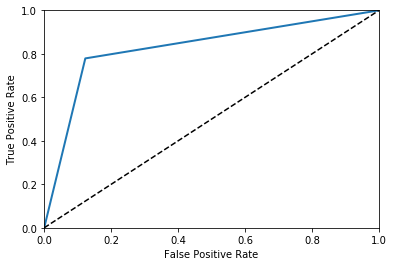

In [79]:
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_pred)

def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr,tpr)
plt.show()

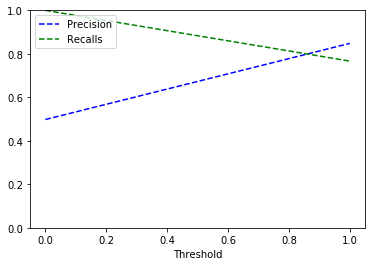

In [80]:
from sklearn.model_selection import cross_val_predict

y_scores=cross_val_predict(model_30days,X_train,y_train,cv=3)

precisions,recalls,thresholds=metrics.precision_recall_curve(y_train,y_scores)

def plot_precision_recall_vs_threshold(precisions,recalls,threshold):
    plt.plot(thresholds,precisions[:-1],"b--",label="Precision")
    plt.plot(thresholds,recalls[:-1],"g--",label="Recalls")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0,1])
    
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

In [81]:
df_f = pd.DataFrame(model_30days.feature_importances_, columns=["Importance"])
df_f

,Importance
0,0.101703
1,0.060869
2,0.033685
3,0.033208
4,0.049790
5,0.071037
6,0.072055
7,0.005280
8,0.024638
9,0.000333


In [82]:
X_train.columns

Index(['AON', 'AGE', 'NUMBER_OF_OS_BILLS', 'RECURRING_AMT', 'LAST_BILL_AMT',
       'LAST_PAY_AMT', 'TOT_BILLED_OS_AMT', 'COMMIT_MONTH', 'LEFT_DAYS',
       'FiveG_plan', 'LEFT_MONTHS', 'jan_package', 'jan_offer_price',
       'GTL_FACTOR', 'jan_revenue', 'jan_data_usage', 'jan_in_call_amt',
       'jan_in_call_cnt', 'jan_out_call_amt', 'jan_out_call_cnt', 'jan_bill',
       'CIVIL_ID_VOICE_IN_COMMITMENT_LINE_CNT',
       'CIVIL_ID_VOICE_NOT_COMMITTED_LINE_CNT',
       'CIVIL_ID_DATA_IN_COMMITMENT_LINE_CNT',
       'CIVIL_ID_DATA_NOT_COMMITTED_LINE_CNT', 'value_base_seg_1 WBB H',
       'value_base_seg_2 WBB M', 'value_base_seg_3 WBB L',
       'value_base_seg_7.Internal Test', 'value_base_seg_?',
       'value_base_seg_nan', 'BARRING_STATUS_?', 'BARRING_STATUS_BARRED',
       'BARRING_STATUS_NOT BARRED', 'BARRING_STATUS_nan',
       'ACTIVATION_CHANNEL_TYPE_?', 'ACTIVATION_CHANNEL_TYPE_nan',
       'Contarct_status_?', 'Contarct_status_COMMITED',
       'Contarct_status_NON_COMMITED',

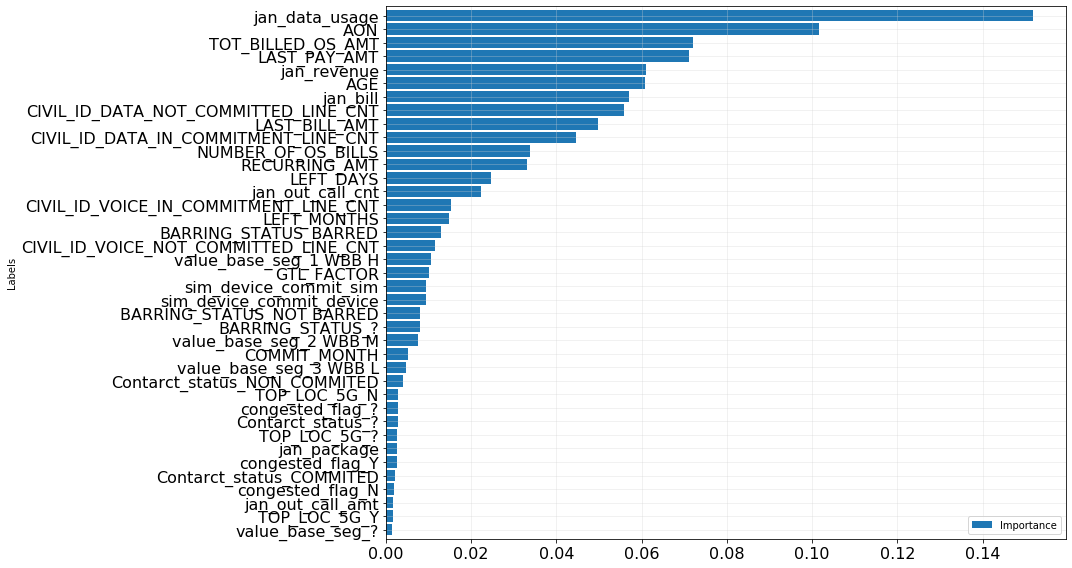

In [83]:
#Feature Importance
df_f = pd.DataFrame(model_30days.feature_importances_, columns=["Importance"])
df_f['Labels'] = X_train.columns
df_f.sort_values("Importance", inplace=True, ascending=True)
df_f.set_index('Labels').sort_values(by='Importance', ascending=True)[19:].plot(kind='barh',figsize=(15,8), width=0.85)

#df_f.set_index('Labels').sort_values(by='Importance', ascending=True)[9:].plot(kind='barh', figsize=(20,20), width=0.85)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(linewidth=1.0, alpha=0.3, color='lightgrey')
plt.tight_layout()
plt.show()

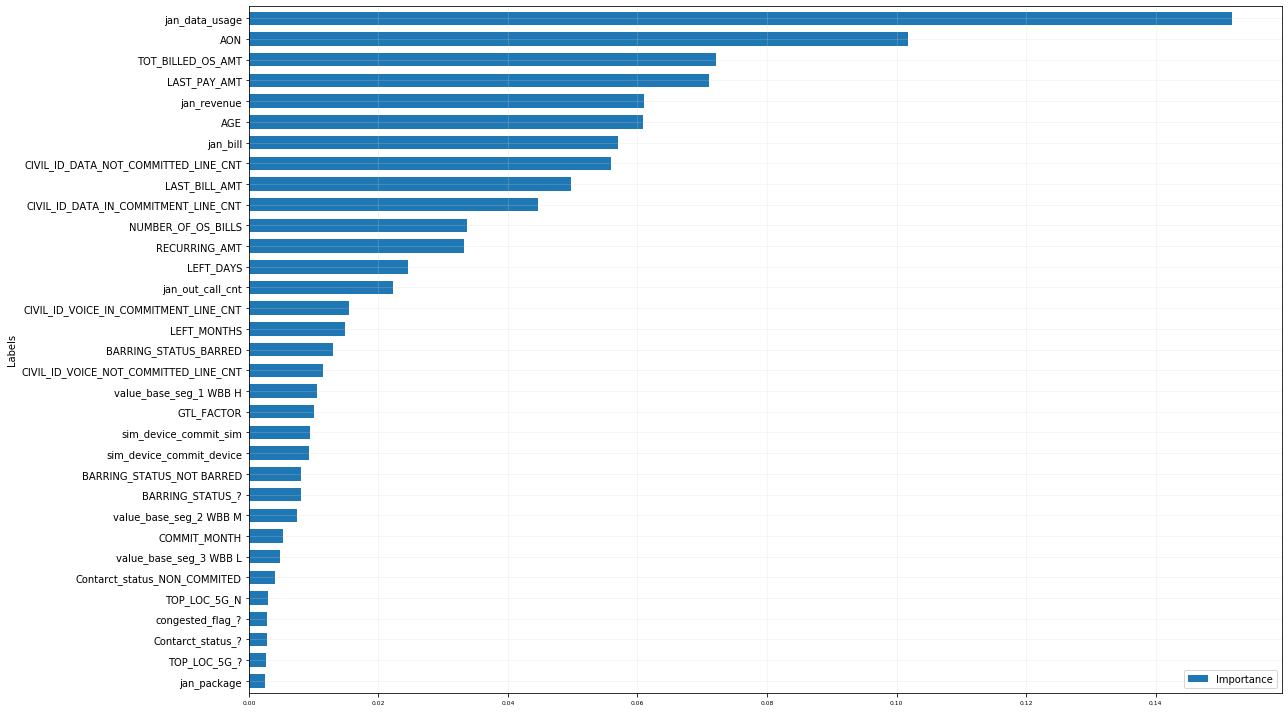

In [84]:
#Feature Importance
df_f = pd.DataFrame(model_30days.feature_importances_, columns=["Importance"])
df_f['Labels'] = X_train.columns
df_f.sort_values("Importance", inplace=True, ascending=True)
df_f.set_index('Labels').sort_values(by='Importance', ascending=True)[25:].plot(kind='barh', figsize=(18,10), width=0.65)
plt.xticks(fontsize=6)
plt.yticks(fontsize=10)
plt.grid(linewidth=0.7, alpha=0.3, color='lightgrey')
plt.tight_layout()
plt.show()

In [85]:
# Save the Modle to file in the current working directory
import pickle
Pkl_Filename = "RF_Model_30days.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model_30days, file)

In [86]:
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    rf_model_30days = pickle.load(file)

rf_model_30days

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=18, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=30,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [87]:
AB=rf_model_30days.predict(A)

In [88]:
AB

array([0., 0., 0., ..., 0., 0., 0.])

In [89]:
dp1=pd.DataFrame(AB)
dp1

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
172197,0.0
172198,1.0
172199,0.0
172200,0.0


In [90]:
AB.shape

(172202,)

In [91]:
pd.Series(AB).value_counts()

0.0    148559
1.0     23643
dtype: int64

In [92]:
# print("Train Accuracy: {}".format(round(train_accuracy,3)))
# print("Test Accuracy: {}".format(round(test_accuracy,3)))
# print("Val Accuracy: {}".format(round(val_accuracy,3)))

# print("Precision Score: {}".format(round(p_score,3)))
# print("Recall Score: {}".format(round(r_score,3)))
# print("F1 Score: {}".format(round(f1_score,3)))
# print("AUC: {}".format(round(auc,3)))

print("Classification Report : ")
print(metrics.classification_report(B,AB))


print("Confusion Matrix : ")
print(metrics.confusion_matrix(B,AB))

Classification Report : 
              precision    recall  f1-score   support

         0.0       0.99      0.89      0.94    165779
         1.0       0.21      0.78      0.33      6423

    accuracy                           0.88    172202
   macro avg       0.60      0.83      0.63    172202
weighted avg       0.96      0.88      0.91    172202

Confusion Matrix : 
[[147139  18640]
 [  1420   5003]]


In [93]:
h = rf_model_30days.predict_proba(A)
h = h[:,1]

In [94]:
h

array([0.47430763, 0.25470237, 0.21953275, ..., 0.39826541, 0.37101365,
       0.37008338])

In [95]:
pd.Series(h[:,]).value_counts()

0.103785    202
0.085083    153
0.083195     98
0.095932     82
0.084765     79
           ... 
0.546264      1
0.416636      1
0.097776      1
0.305621      1
0.282975      1
Length: 166100, dtype: int64

In [96]:
dp=pd.DataFrame(h)
dp

,0
0,0.474308
1,0.254702
2,0.219533
3,0.375221
4,0.276403
...,...
172197,0.399784
172198,0.673723
172199,0.398265
172200,0.371014


In [97]:
churn_df=pd.DataFrame()

In [98]:
churn_df['Churn_Group'] = pd.cut(dp[0], bins=[-0.1,0.2,0.4,0.6,0.8,1], labels=["V Low","Low", "Medium", "High","V High"])

In [99]:
churn_df['Quantile_cut']= pd.cut(dp[0], bins=[-0.1,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,1],
                      labels=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20'])

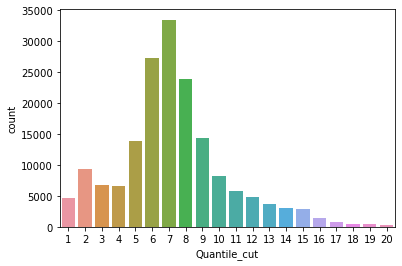

In [100]:
sns.countplot(churn_df['Quantile_cut'])

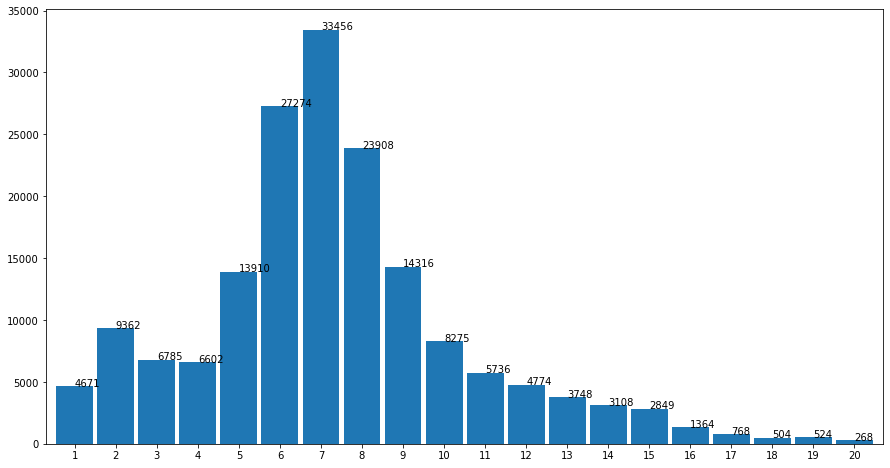

In [101]:
s = churn_df['Quantile_cut'].value_counts().sort_index()

plt.figure(figsize=(15,8))
ax=s.plot.bar(width=.9) 
#ax = sns.countplot(x="class", data=data)
plt.xticks(rotation=0)
for i, v in s.reset_index().iterrows():
    ax.text(i, v.Quantile_cut + 0.2 , v.Quantile_cut, color='black')

In [102]:
churn_df['Churn_Group'].value_counts()

Low       98548
Medium    33101
V Low     27420
High      11069
V High     2064
Name: Churn_Group, dtype: int64

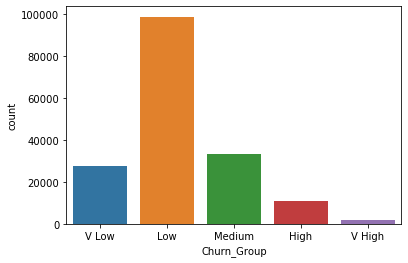

In [103]:
sns.countplot(churn_df['Churn_Group'])

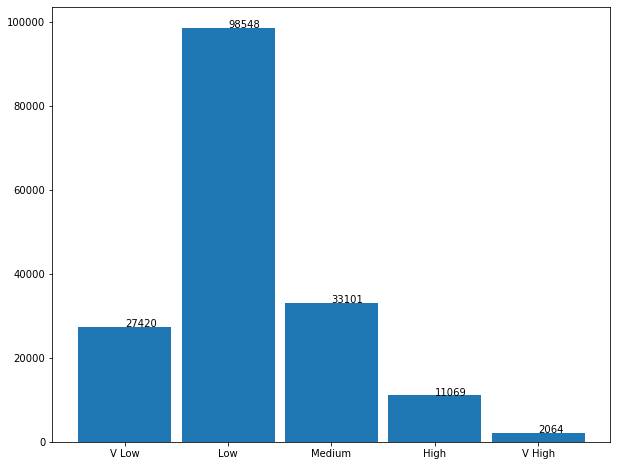

In [104]:
s = churn_df['Churn_Group'].value_counts().sort_index()

plt.figure(figsize=(10,8))
ax=s.plot.bar(width=.9) 
#ax = sns.countplot(x="class", data=data)
plt.xticks(rotation=0)
for i, v in s.reset_index().iterrows():
    ax.text(i, v.Churn_Group + 0.2 , v.Churn_Group, color='black')

In [105]:
churn_df['CO_ID']=data['Co_id']
churn_df['Actual_churn']=y
churn_df['Predict_churn']=dp1[0]
churn_df['Churn_Probability']=dp[0]


In [106]:
list(churn_df)

['Churn_Group',
 'Quantile_cut',
 'CO_ID',
 'Actual_churn',
 'Predict_churn',
 'Churn_Probability']

In [107]:
model_output = churn_df[['CO_ID','Churn_Probability','Churn_Group','Predict_churn','Quantile_cut']]
model_output

,CO_ID,Churn_Probability,Churn_Group,Predict_churn,Quantile_cut
0,14086666,0.474308,Medium,0.0,10
1,13431983,0.254702,Low,0.0,6
2,10367687,0.219533,Low,0.0,5
3,16538266,0.375221,Low,0.0,8
4,19522544,0.276403,Low,0.0,6
...,...,...,...,...,...
172197,13531232,0.399784,Low,0.0,8
172198,11882279,0.673723,High,1.0,14
172199,19139483,0.398265,Low,0.0,8
172200,17368056,0.371014,Low,0.0,8


In [108]:
model_output = churn_df[['CO_ID','Churn_Probability','Churn_Group','Predict_churn','Actual_churn']]
model_output

,CO_ID,Churn_Probability,Churn_Group,Predict_churn,Actual_churn
0,14086666,0.474308,Medium,0.0,0.0
1,13431983,0.254702,Low,0.0,0.0
2,10367687,0.219533,Low,0.0,0.0
3,16538266,0.375221,Low,0.0,0.0
4,19522544,0.276403,Low,0.0,0.0
...,...,...,...,...,...
172197,13531232,0.399784,Low,0.0,1.0
172198,11882279,0.673723,High,1.0,1.0
172199,19139483,0.398265,Low,0.0,1.0
172200,17368056,0.371014,Low,0.0,1.0


In [109]:
A.columns

Index(['AON', 'AGE', 'NUMBER_OF_OS_BILLS', 'RECURRING_AMT', 'LAST_BILL_AMT',
       'LAST_PAY_AMT', 'TOT_BILLED_OS_AMT', 'COMMIT_MONTH', 'LEFT_DAYS',
       'FiveG_plan', 'LEFT_MONTHS', 'jan_package', 'jan_offer_price',
       'GTL_FACTOR', 'jan_revenue', 'jan_data_usage', 'jan_in_call_amt',
       'jan_in_call_cnt', 'jan_out_call_amt', 'jan_out_call_cnt', 'jan_bill',
       'CIVIL_ID_VOICE_IN_COMMITMENT_LINE_CNT',
       'CIVIL_ID_VOICE_NOT_COMMITTED_LINE_CNT',
       'CIVIL_ID_DATA_IN_COMMITMENT_LINE_CNT',
       'CIVIL_ID_DATA_NOT_COMMITTED_LINE_CNT', 'value_base_seg_1 WBB H',
       'value_base_seg_2 WBB M', 'value_base_seg_3 WBB L',
       'value_base_seg_7.Internal Test', 'value_base_seg_?',
       'value_base_seg_nan', 'BARRING_STATUS_?', 'BARRING_STATUS_BARRED',
       'BARRING_STATUS_NOT BARRED', 'BARRING_STATUS_nan',
       'ACTIVATION_CHANNEL_TYPE_?', 'ACTIVATION_CHANNEL_TYPE_nan',
       'Contarct_status_?', 'Contarct_status_COMMITED',
       'Contarct_status_NON_COMMITED',

In [ ]:
churn_df['AON']=A['AON']
churn_df['jan_data_usage']=A['jan_data_usage']
churn_df['CIVIL_ID_DATA_NOT_COMMITTED_LINE_CNT']=A['CIVIL_ID_DATA_NOT_COMMITTED_LINE_CNT']
churn_df['jan_bill']=A['jan_bill']
churn_df['LAST_PAY_AMT']=A['LAST_PAY_AMT']
churn_df['jan_revenue']=A['jan_revenue']


In [420]:
def quantile_value(a):
    print("Count :",len(churn_df[churn_df['Quantile_cut']==a]))
    print("Pre_Churn_Count :",churn_df['Predict_churn'][churn_df['Quantile_cut']==a].sum())
    #print("churn_Group :",churn_df['Churn_Group'][churn_df['Quantile_cut']==a].unique())
    print("Churn_Actual_Count :",churn_df['Actual_churn'][churn_df['Quantile_cut']==a].sum())
    print("Churn_Actual_AprobRate :",churn_df['Actual_churn'][churn_df['Quantile_cut']==a].mean())
    print("Churn_Pred_Probability" ,churn_df['Churn_Probability'][churn_df['Quantile_cut']==a].mean())
    
    print("AON:",churn_df['AON'][churn_df['Quantile_cut']==a].sum())
    print("jan_data_usage : ",churn_df['jan_data_usage'][churn_df['Quantile_cut']==a].sum())
    print("CIVIL_ID_DATA_NOT_COMMITTED_LINE_CNT",churn_df['CIVIL_ID_DATA_NOT_COMMITTED_LINE_CNT'][churn_df['Quantile_cut']==a].sum())                                               
    print("jan_bill :",churn_df['jan_bill'][churn_df['Quantile_cut']==a].sum())
    print("LAST_PAY_AMT",churn_df['LAST_PAY_AMT'][churn_df['Quantile_cut']==a].sum())
    

In [497]:
quantile_value('20')

Count : 788
Pre_Churn_Count : 788.0
Churn_Actual_Count : 759.0
Churn_Actual_AprobRate : 0.9631979695431472
Churn_Pred_Probability 0.9731594404147103
AON: 572567.0
jan_data_usage :  89762786.23900001
CIVIL_ID_DATA_NOT_COMMITTED_LINE_CNT 1132.0
jan_bill : 4456.4
LAST_PAY_AMT 17887.968


n_train = len(X_train)
n_test = len(X_test)
n_val = len(X_val)
n_samples =[n_train,n_test,n_val]

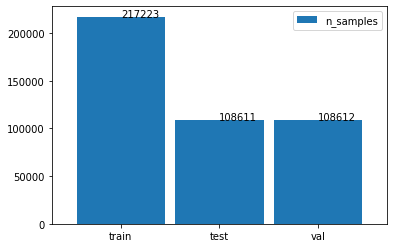

In [324]:
samples_df = pd.DataFrame(n_samples,columns=['n_samples'],index = ['train','test','val'])
ax2 = samples_df.plot.bar(width=.9)
plt.xticks(rotation=0)
for i, v in samples_df.reset_index().iterrows():
    ax2.text(i, v.n_samples + 0.2 , v.n_samples,  color='black')

In [325]:
#Exporting the data
model_output.to_csv("/home/cvmadm/post_ls_churn/feb_churn_30days.csv")

In [326]:
model_output['Churn_output'] = ['Y' if (model_output['Churn_Group'] == 'Medium') &
                                (model_output['Churn_Group'] == 'High') &
                                (model_output['Churn_Group'] == 'V High') else 'N']

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [327]:
Churn_output = []
for row in model_output['Churn_Group']:
    if row == 'Medium':
        Churn_output.append('Y')
    elif row == 'High':
        Churn_output.append('Y')
    elif row == 'V High':
        Churn_output.append('Y')
    else:
        Churn_output.append('N')

In [328]:
model_output['Churn_output'] = Churn_output

In [329]:
model_output.Churn_output.value_counts()

N    186259
Y     34902
Name: Churn_output, dtype: int64

In [330]:
model_output['Churn_output'] = ['Y' if model_output['Churn_Group'].isin(['High','V High','Medium']) else 'N']

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [331]:
model_output[(model_output['Churn_Group'] == 'High')&(model_output['Churn_Group'] == 'Low')]

,CO_ID,Churn_Probability,Churn_Group,Predict_churn,Actual_churn,Churn_output


In [332]:
model_output[(model_output['Churn_Group'] == 'Low')]

,CO_ID,Churn_Probability,Churn_Group,Predict_churn,Actual_churn,Churn_output
4,13063358,0.287317,Low,0.0,0.0,N
10,11751708,0.238797,Low,0.0,0.0,N
12,16904342,0.274445,Low,0.0,0.0,N
13,13441037,0.211421,Low,0.0,0.0,N
16,13044842,0.300256,Low,0.0,0.0,N
...,...,...,...,...,...,...
221152,19645672,0.357696,Low,0.0,1.0,N
221153,12112871,0.238353,Low,0.0,1.0,N
221154,17861704,0.224363,Low,0.0,1.0,N
221155,13531232,0.275357,Low,0.0,1.0,N


In [333]:
model_output[(model_output['Churn_Group'] == 'High')]

,CO_ID,Churn_Probability,Churn_Group,Predict_churn,Actual_churn,Churn_output
61,11934481,0.666584,High,1.0,0.0,Y
84,14163605,0.742875,High,1.0,0.0,Y
130,17762741,0.621772,High,1.0,0.0,Y
137,18120232,0.625222,High,1.0,0.0,Y
159,13025817,0.737193,High,1.0,0.0,Y
...,...,...,...,...,...,...
220979,17582765,0.685605,High,1.0,1.0,Y
220980,12112749,0.679696,High,1.0,1.0,Y
221027,16351232,0.694194,High,1.0,1.0,Y
221062,18115359,0.662877,High,1.0,1.0,Y


In [335]:
#Exporting the data
model_output.to_csv("/home/cvmadm/post_ls_churn/feb_churn_30days.csv")